# Case Study Hacker Statistics


* Notebook Author: Elesmy Orellana 
* This Project is Provided/Owned by: DataCamp 
* This notebook was created as a reproducible reference.
* The material is from the DataCamp course. 
* If you find the content beneficial, consider a DataCamp Subscription.


In this section we will implement an algorithm that will emulate the following game : You do a bet with your friend that if you start at the first step of the empire state building and that on each step you roll a dice

* If you roll 1 or 2 you descend one step
* If you roll 3 or 4 or 5 you go up one step
* If you roll a 6 you roll again and you go up this new number of steps
* on each roll you have 0.1% of falling down the stairs


Let’s check how much chance we have of betting that we will reach step 60

First some tools that we need to create the algorythm

So to randomize numbers in order to emulate a coin toss or a dice roll :

To generate random numbers:


* np.random.seed(123) same seed will generate the same set of random numbers and ensures reproducibility
* np.random.rand() this will generate random numbers from 0 to 1
* np.random.randint(0, 2) this will randomly generate 0 or 1, since 2 will not be included

In [9]:
import numpy as np
import matplotlib as plt
np.random.rand()
#Emulates a number between 0 and 1 

0.0014611175987575553

In [10]:
np.random.seed(123)
#if you put a seed you will generate the same sequence of random
#numbers, this permits reproducibility of your scenarios 
 
#Coin toss, take a random int between 0 and 2 (exclusive) : 
coin = np.random.randint(0,2)
print(coin)

0


In [11]:
coin = np.random.randint(0,2)
print(coin)
if coin == 0:
    print("heads")
else:
    print("tails")

1
tails


In [12]:
#Dice roll 
dice=np.random.randint(1,7)

### What is a Random Walk ?

 A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. An elementary example of a random walk is the random walk on  the  integer number line, Z,  which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas, the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.  

Heads or tails random walk

## Simulate Random Walk

In [13]:
import numpy as np
np.random.seed(123)
outcomes = []

for x in range(10) :
    coin = np.random.randint(0, 2)
    if coin == 0 :
        outcomes.append("heads")
else :
    outcomes.append("tails")
print(outcomes)

['heads', 'heads', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails']


In [14]:
np.random.seed(123)
tails = [0]
for x in range(10) :
    coin = np.random.randint(0, 2)
    tails.append(tails[x] + coin)
print(tails)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


So in the first step we just save the result of the toss. In the second one whe will count the number of times we had a tails during the run.

Now, if we want to visualize the result of tossing 10000 times 10 times the coin and see what would be the distribution of the result (how many times did we score 3 times tails, 5 times tails and so on..)



## This is the Result: 


Visualize the random walk

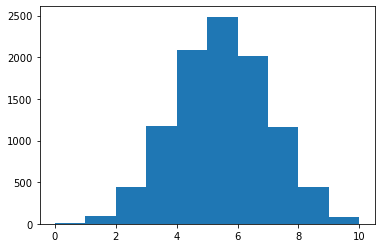

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
final_tails = []

for x in range(10000) :
    tails = [0]
    for x in range(10) :
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
    
plt.hist(final_tails, bins = 10)
plt.show()

Which is quite logical, as it is pretty much 50% chance.. so we have high chance of score 5 tails out of 10 tosses.

So… now we have all the tools to emulate our game :

Distribution
What is the chance that you can reach 60 steps after throwing the dice for 100 times?

* Each random walk has an end point
* Simulate this walk 10,000 times, then you get 10,000 end points: Distribution
* Calculate the chances

Create a list that contains the path of 10 random walks and visualize it

In [16]:
# numpy and matplotlib imported, seed set

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

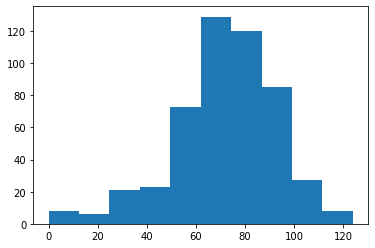

In [17]:
# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))


# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

The Numpy array ends contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

The chance to win our bet is 78.4%